<h1> RMCH</h1>

In [13]:
from __future__ import division
import numpy as np
import json
import re
import gzip
import pandas as pd
%pylab inline
pylab.rcParams['figure.figsize'] = (12.0, 8.0) # set size of figures"
plt.rcParams.update({'font.size': 24})
import seaborn as sns
import datetime

from IPython.html.widgets import *
from nvd3 import pieChart
import nvd3
nvd3.ipynb.initialize_javascript(use_remote=True)

pd.set_option('display.max_rows', 50)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'Text', 'Widget', 'Button', 'interactive']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<h1> Load in the indicator names and make an indicator ID mapping </h1>

In [216]:
import sys
sys.path.append('/Users/attiladobi/zenysis')
import config.et.indicators

In [357]:
IDlookup = {val['id']:val for cluster in config.indicators.HMIS_GROUPS for val in cluster['indicators']}
len(IDlookup)

943

In [358]:
IDlookup['hmis_indicator_3633']

{'id': 'hmis_indicator_3633',
 'program_area': 'Communicable Diseases',
 'sub_area': 'HIV/AIDS',
 'text': 'Clients testing positive for HIV 25-49 years: Males'}

<h1> Load the data </h1>

In [5]:
# read the entire file into a python array
with gzip.open('/Users/attiladobi/zendata/rmch/20161205/processed_rows.json.gz', 'rb') as f:
    data = f.readlines()

# remove the trailing "\n" from each line
data = map(lambda x: x.rstrip(), data)
data_json_str = "[" + ','.join(data) + "]"

# now, load it into pandas
DF = pd.read_json(data_json_str)

'''
#convert date:
DF['Date']=pd.to_datetime(DF['Real_Date'])
DF['day'] = pd.to_numeric(DF['Date'].dt.day)
DF['month'] = pd.to_numeric(DF['Date'].dt.month)
DF['year'] = pd.to_numeric(DF['Date'].dt.year)

#ADD Quarter mapping to the data
DF['Quarter']=[quarter_map(year,month) for year,month in DF[['year','month']].values]
'''

"\n#convert date:\nDF['Date']=pd.to_datetime(DF['Real_Date'])\nDF['day'] = pd.to_numeric(DF['Date'].dt.day)\nDF['month'] = pd.to_numeric(DF['Date'].dt.month)\nDF['year'] = pd.to_numeric(DF['Date'].dt.year)\n\n#ADD Quarter mapping to the data\nDF['Quarter']=[quarter_map(year,month) for year,month in DF[['year','month']].values]\n"

In [6]:
DF

,FacilityName,Real_Date,RegionLat,RegionLon,RegionName,WoredaLat,WoredaLon,WoredaName,ZoneLat,ZoneLon,ZoneName,field,source,val
0,,2015-09-12,6.465809,36.806469,SNNPR,6.941752,38.047181,DUGUNA FANGO,6.861027,37.715612,Wolayta,implementing_agent_ifhp,RMCH,1.000000
1,,2015-09-12,6.465809,36.806469,SNNPR,6.941752,38.047181,DUGUNA FANGO,6.861027,37.715612,Wolayta,sub_focus_area_unknown,RMCH,1.000000
2,,2015-09-12,6.465809,36.806469,SNNPR,6.941752,38.047181,DUGUNA FANGO,6.861027,37.715612,Wolayta,funding_agent_unknown,RMCH,1.000000
3,,2015-09-12,6.465809,36.806469,SNNPR,6.941752,38.047181,DUGUNA FANGO,6.861027,37.715612,Wolayta,focus_area_unknown,RMCH,1.000000
4,,2015-09-12,6.465809,36.806469,SNNPR,6.941752,38.047181,DUGUNA FANGO,6.861027,37.715612,Wolayta,deep_dive_unknown,RMCH,1.000000
5,,2015-09-12,6.932778,43.329883,Somali,9.352316,42.794194,Jigjiga,7.370129,44.211368,Somali,deep_dive_technical_assistance,RMCH,21316.000000
6,,2015-09-12,6.932778,43.329883,Somali,9.352316,42.794194,Jigjiga,7.370129,44.211368,Somali,deep_dive_research_knowledge_management_and_wo...,RMCH,324.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13447,,2015-09-12,7.323567,38.660525,Oromiya,8.319159,38.953953,Bora,8.520294,39.150526,East Shewa,funding_agent_embasy_of_the_kingdom_of_netherl...,RMCH,3470.600000
13448,,2015-09-12,7.323567,38.660525,Oromiya,8.319159,38.953953,Bora,8.520294,39.150526,East Shewa,implementing_agent_chai,RMCH,5322.000000


<h1> check dates </h1>

In [7]:
DF.groupby('Real_Date').count()

,FacilityName,RegionLat,RegionLon,RegionName,WoredaLat,WoredaLon,WoredaName,ZoneLat,ZoneLon,ZoneName,field,source,val
Real_Date,,,,,,,,,,,,,
2015-09-12,13454,13454,13454,13454,13409,13409,13454,13454,13454,13454,13454,13454,13454


<h3> there is only one data = 2015-09-12 </h3>

<h3> group by Woreda, Zone, Region, Nation </h3>

In [19]:
DF.loc[DF['field'].str.contains('focus_area')].groupby(['field', 'RegionName']).sum()

RegionLat  \
field                                             RegionName                       
focus_area_child_health                           Addis Ababa           8.980483   
                                                  Afar                144.437341   
                                                  Amhara              913.631246   
                                                  Benishangul-Gumuz    42.011698   
                                                  Gambella             30.735402   
                                                  Oromiya             739.680307   
                                                  SNNPR               290.961393   
                                                  Somali               90.126119   
                                                  Tigray              137.771147   
focus_area_expanded_immunization_program_epi      Afar                 84.255115   
                                                  Amhara              127.214477   
                                                  Oromiya             139.147781   
                                                  SNNPR               116.384557   
                                                  Somali               34.663892   
                                                  Tigray              110.216918   
focus_area_family_planning                        Addis Ababa          98.785313   
                                                  Afar                 84.255115   
                                                  Amhara             1885.087254   
                                                  Benishangul-Gumuz    42.011698   
                                                  Dire Dawa            19.212538   
                                                  Gambella             23.051551   
                                                  Harreri              27.868980   
                                                  Oromiya            2409.453674   
                                                  SNNPR               769.431238   
                                                  Somali               27.731114   
...                                                                          ...   
sub_focus_area_post_partum_family_planning        SNNPR                64.658087   
                                                  Tigray               41.331344   
sub_focus_area_referral_system                    Addis Ababa          17.960966   
                                                  Afar                 12.036445   
                                                  Amhara               80.954667   
                                                  Dire Dawa             9.606269   
                                                  Oromiya              51.264972   
                                                  SNNPR                25.863235   
                                                  Somali                6.932778   
                                                  Tigray               27.554229   
sub_focus_area_routine_immunization_strengthening Afar                 84.255115   
                                                  Amhara              127.214477   
                                                  Oromiya             131.824213   
                                                  SNNPR               116.384557   
                                                  Tigray              110.216918   
sub_focus_area_unknown                            Amhara              774.851816   
                                                  Oromiya             820.239549   
                                                  SNNPR               355.619480   
                                                  Tigray              427.090557   
sub_focus_area_water_sanitation                   Afar                108.328006   
                                       

<h1> Load json data from the front end and creat a data frame </h1>

In [888]:
with open('/Users/attiladobi/Downloads/test.json', 'rb') as f:
    data = f.readlines()
# remove the trailing "\n" from each line
data = map(lambda x: x.rstrip(), data)
data_json_str = "[" + ','.join(data) + "]"

# now, load it into pandas
DF2 = pd.read_json(data_json_str)

In [889]:
df_list = []
for region in DF2['byGeo'][0].keys():
    region_name = region.split('_')[0]
    meta_data = pd.DataFrame(DF2['byGeo'][0][region]['data']['month'])
    formatted_data = pd.DataFrame(meta_data[1:].stack()).reset_index(level=0)
    formatted_data.index = [pd.to_datetime(val) for val in formatted_data.index]
    formatted_data.columns = ['Indicator_id', 'val']
    formatted_data.index.name = 'Real_Date'
    formatted_data['Region'] = region_name
    df_list.append(formatted_data)
DF_ind=pd.concat(df_list)
DF_ind['Indicator'] = [IDlookup[val]['text'] for val in DF_ind['Indicator_id']]
DF_ind['program_area'] = [IDlookup[val]['program_area'] for val in DF_ind['Indicator_id']]
DF_ind['sub_area'] = [IDlookup[val]['sub_area'] for val in DF_ind['Indicator_id']]

In [668]:
DF_ind.groupby('Indicator').val.sum().reset_index()

,Indicator,val
0,Clients receiving HIV test results,5040162
1,Clients receiving HIV test results 15-19 years...,610475
2,Clients receiving HIV test results 15-19 years...,492981
3,Clients receiving HIV test results 20-24 years...,810045
4,Clients receiving HIV test results 20-24 years...,887728
5,Clients receiving HIV test results 25-49 years...,883646
6,Clients receiving HIV test results 25-49 years...,1171433
7,Clients receiving HIV test results >= 50 years...,158354
8,Clients receiving HIV test results >= 50 years...,230384
9,Clients testing positive for HIV,54440


In [890]:
calc_df = DF_ind.loc[DF_ind['Indicator'].str.contains('Females') & \
                     DF_ind['Indicator'].str.contains('receiving HIV test results') &\
                     ~DF_ind['Indicator'].str.contains('50')]\
                    .reset_index().groupby(['Real_Date','Region']).val.sum()\
                    .reset_index().set_index('Real_Date')
calc_df['Indicator']='Clients receiving HIV test results 15-49 years: Females'
DF_ind = pd.concat([DF_ind, calc_df])


calc_df = DF_ind.loc[DF_ind['Indicator'].str.contains('Males') & \
                    DF_ind['Indicator'].str.contains('receiving HIV test results')&\
                    ~DF_ind['Indicator'].str.contains('50')]\
                    .reset_index().groupby(['Real_Date','Region']).val.sum()\
                    .reset_index().set_index('Real_Date')
calc_df['Indicator']='Clients receiving HIV test results 15-49 years: Males'
DF_ind = pd.concat([DF_ind, calc_df])

calc_df = DF_ind.loc[DF_ind['Indicator'].str.contains('Females') & \
                    DF_ind['Indicator'].str.contains('testing positive') &\
                    ~DF_ind['Indicator'].str.contains('50')]\
                    .reset_index().groupby(['Real_Date','Region']).val.sum()\
                    .reset_index().set_index('Real_Date')
calc_df['Indicator']='Clients testing positive for HIV 15-49 years: Females'
DF_ind = pd.concat([DF_ind, calc_df])

calc_df = DF_ind.loc[DF_ind['Indicator'].str.contains('Males') & \
                    DF_ind['Indicator'].str.contains('testing positive') &\
                    ~DF_ind['Indicator'].str.contains('50')]\
                    .reset_index().groupby(['Real_Date','Region']).val.sum()\
                    .reset_index().set_index('Real_Date')
calc_df['Indicator']='lients testing positive for HIV 15-49 years: Males'
DF_ind = pd.concat([DF_ind, calc_df])

<h1> Plot indicators </h1>

In [860]:
def pd_proper_dateformat(series):
    '''Given a pandas time series return x, y with the time formatted to plot in matplotlib'''
    return series.index.astype(datetime.datetime), series.values

def frac_err(num, sig_num, den, sig_den):
    return sqrt( (sig_num / den) ** 2 + ((sig_den * num) / (den**2)) ** 2)

In [875]:
def pd_proper_dateformat(series):
    '''Given a pandas time series return x, y with the time formatted to plot in matplotlib'''
    return series.index.astype(datetime.datetime), series.values

def plot_date_indicator(dataframe, indicator, ind2=None):
    to_plot = DF_ind.loc[DF_ind['Indicator'] == indicator].reset_index().groupby(['Region', 'Real_Date']).val.sum()
    ylab_text = indicator    
    #If not none use indicator 2 as the denominator
    if ind2:
        to_plot /= DF_ind.loc[DF_ind['Indicator'] == ind2].reset_index().groupby(['Region', 'Real_Date']).val.sum()
        ylab_text = '%s per \n %s' % (indicator, ind2)
        
    start,stop=0,1
    number_of_colors= len(to_plot.index.levels[0])
    cm_subsection = linspace(start, stop, number_of_colors) 
    colors = [ cm.jet(x) for x in cm_subsection ]

    fig=figure()
    fig.set_size_inches(13, 9)
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

    for level,color in zip(to_plot.index.levels[0],colors):
        x, y = pd_proper_dateformat(to_plot[level])
        plt.plot_date(x, y, '.-', color=color, markersize=20, label=level,)
    ylabel(ylab_text)
    xlabel('Date')
    legend(loc='upper right', numpoints=1,fontsize=12)
    ax = gca()
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b\n%Y'))
    #ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b'))
    #yscale('log')
    
    return to_plot

def plot_date_indicator_nation(dataframe, indicator, ind2=None, plt_mean=False, plt_mean_std=False):
    to_plot = DF_ind.loc[DF_ind['Indicator'] == indicator].reset_index().groupby(['Real_Date']).val.sum()
    yn = to_plot.values
    sqrtNn = sqrt(yn)
    y_err = sqrtNn
    ylab_text = indicator
    #If not none use indicator 2 as the denominator
    if ind2:
        to_plot_d = DF_ind.loc[DF_ind['Indicator'] == ind2].reset_index().groupby(['Real_Date']).val.sum()
        to_plot /= to_plot_d
        yt = to_plot_d.values
        sqrtNt = sqrt(yt)
        y_err = frac_err(yn, sqrtNn, yt, sqrtNt)
        #use binomial error
        p = to_plot.values
        y_err = sqrt( p*(1-p) / yt )
        ylab_text = '%s per \n %s' % (indicator, ind2)
        
    fig=figure()
    fig.set_size_inches(13, 9)
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
    x, y = pd_proper_dateformat(to_plot)
    y_mean = ones_like(y)*mean(y)
    y_mean_err = std(y) / sqrt(len(y))
    plt.plot_date(x, y, '.-', color='b', markersize=20, label='Nation',)
    plt.fill_between(x, y-y_err, y+y_err,
        alpha=0.2, edgecolor='#1B2ACC', facecolor='#089FFF',
        linewidth=4, linestyle='dashdot', antialiased=True, label=r'1 $\sigma$')
        
    if plt_mean:
        plt.plot_date(x, y_mean, '-', color='k', markersize=20, label='Mean',)
    if plt_mean_std:    
        plt.fill_between(x, y_mean-y_mean_err, y_mean+y_mean_err,
        alpha=0.2, edgecolor='black', facecolor='grey',
        linewidth=4, linestyle='dashdot', antialiased=True)
    
    #x has to be in int to fit the data
    x_fit = to_plot.index.astype(int)
    fit = np.poly1d(np.polyfit(x_fit, y, 1))
    y_lin = fit(x_fit)
    plt.plot_date(x, y_lin,'-', color='r', label='Liner Fit',)
    
    ylabel(ylab_text)
    xlabel('Date')
    legend(loc='upper right', numpoints=1,fontsize=12)
    ax = gca()
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b\n%Y'))
    
    return to_plot

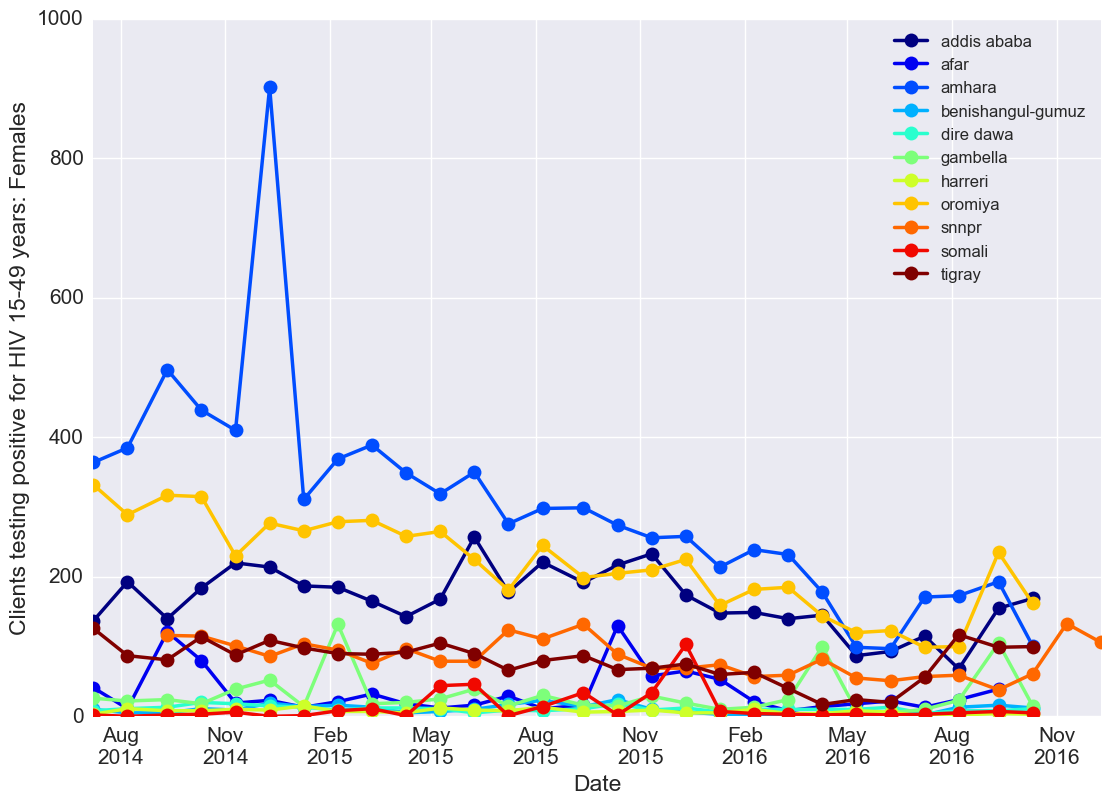

In [939]:
indicator = 'Clients testing positive for HIV 15-49 years: Females'
series_d = plot_date_indicator(DF_ind, indicator)

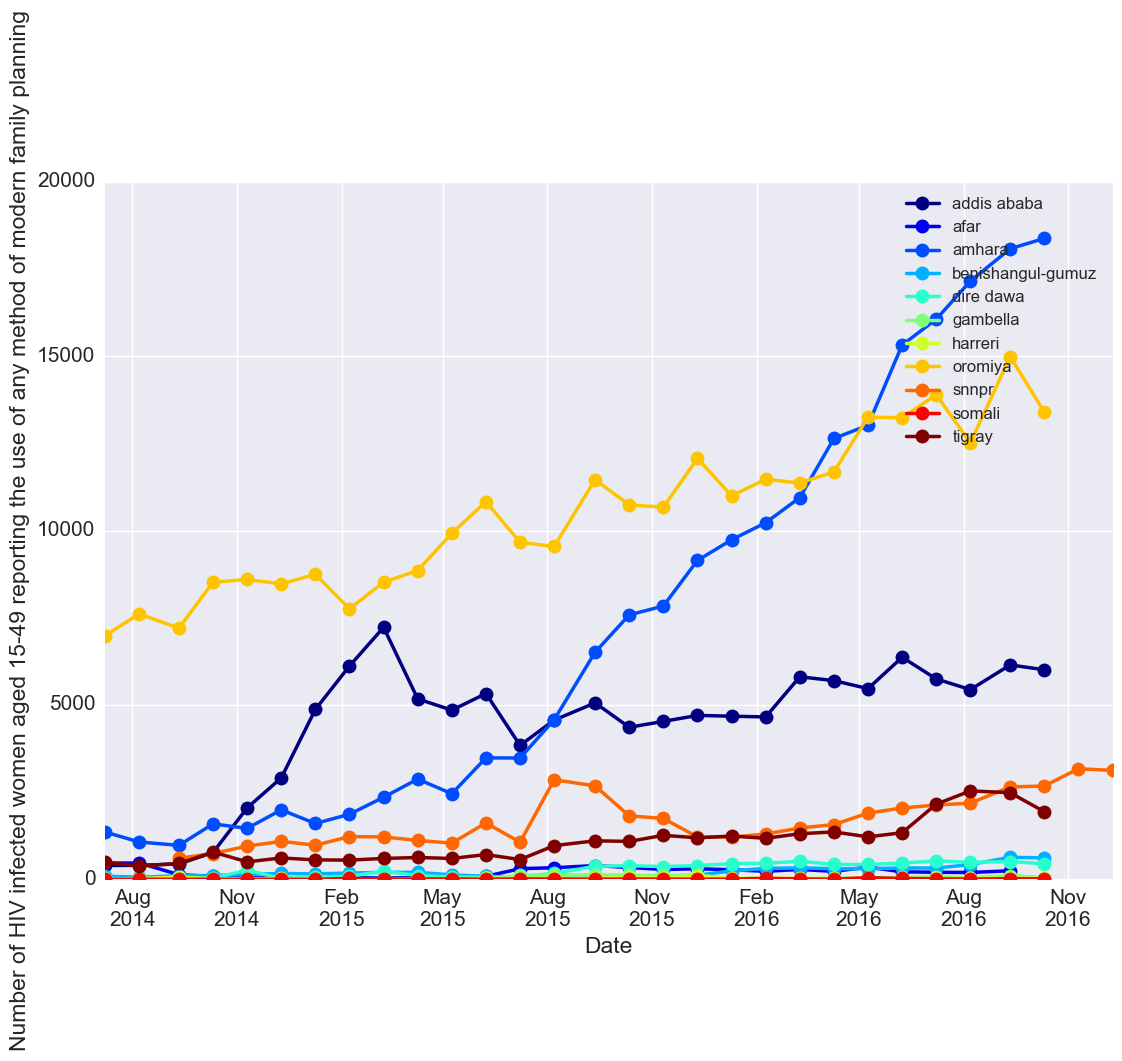

In [892]:
indicator = 'Number of HIV infected women aged 15-49 reporting the use of any method of modern family planning'
series_n = plot_date_indicator(DF_ind, indicator)

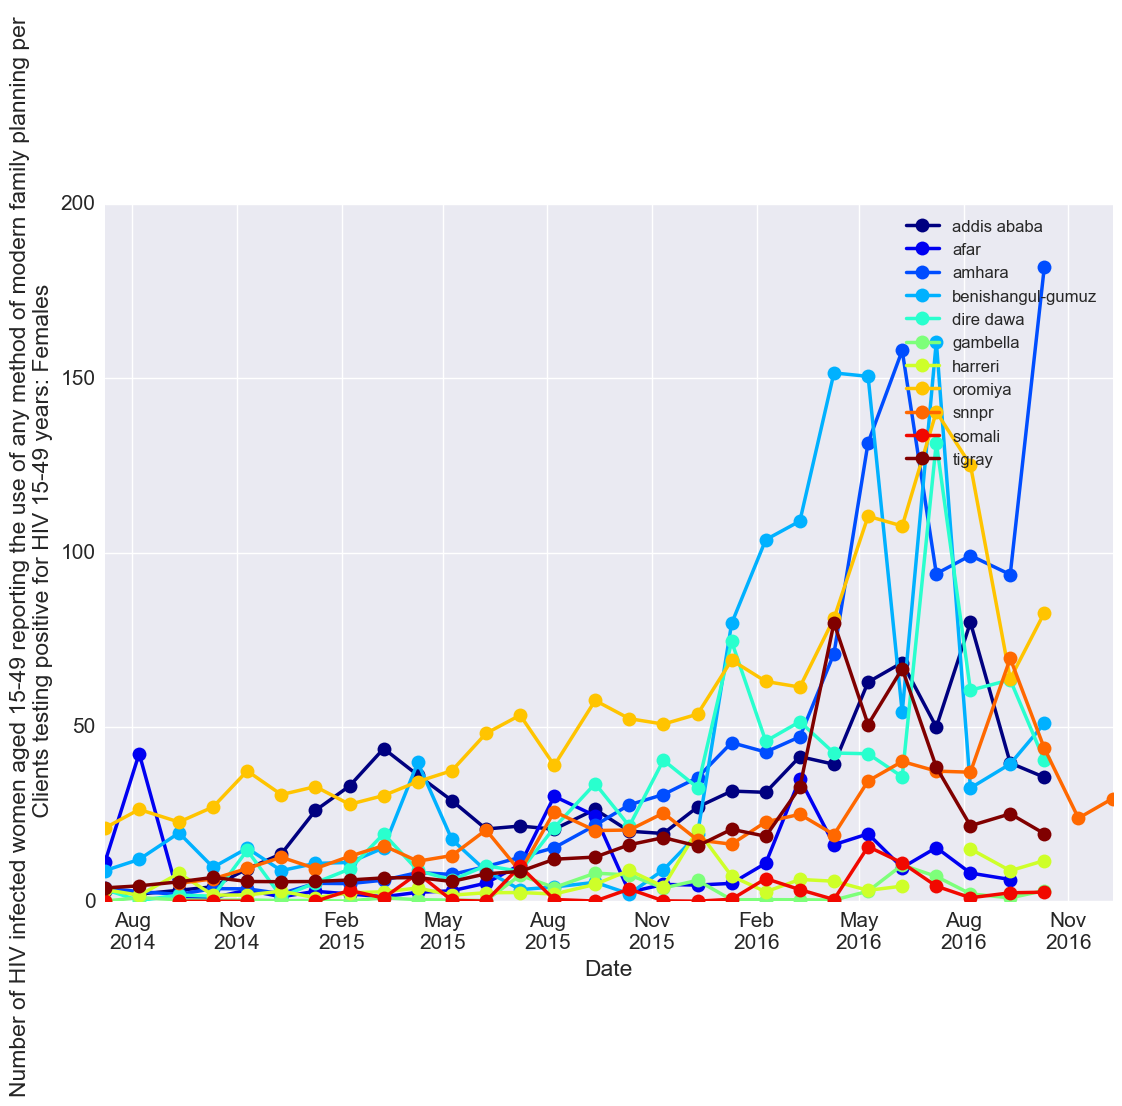

In [940]:
indicator = 'Number of HIV infected women aged 15-49 reporting the use of any method of modern family planning'
indicator2 = 'Clients testing positive for HIV 15-49 years: Females'
series_ratio = plot_date_indicator(DF_ind, indicator, ind2=indicator2)

<h1> Nationally </h1>

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:50: RuntimeWarning: invalid value encountered in sqrt


TypeError: 'str' object is not callable

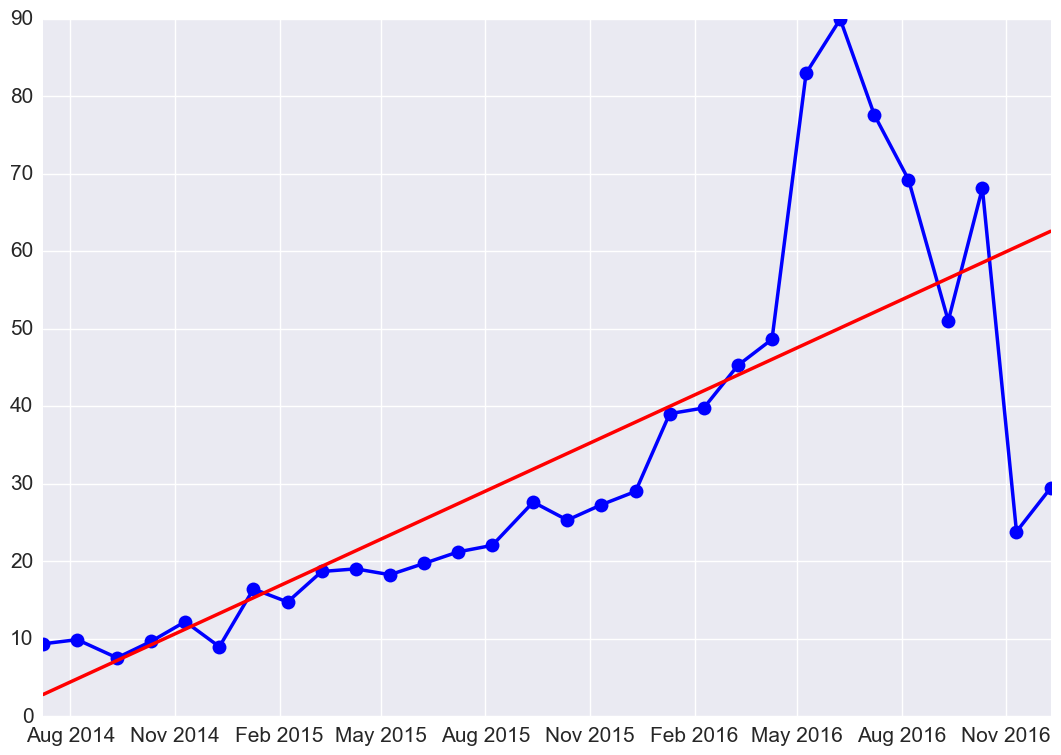

In [999]:
indicator = 'Number of HIV infected women aged 15-49 reporting the use of any method of modern family planning'
indicator2 = 'Clients testing positive for HIV 15-49 years: Females'
series_ratio = plot_date_indicator_nation(DF_ind, indicator, ind2=indicator2)

<h1> Make scatter plot of the two </h1>

In [942]:
pd_joined = series_n.reset_index().join(series_d.reset_index(), how='inner', lsuffix='_num', rsuffix='_den')

In [968]:
series_num = pd_joined.groupby(['Region_num', 'Real_Date_num']).val_num.sum()
series_den = pd_joined.groupby(['Region_num', 'Real_Date_num']).val_den.sum()

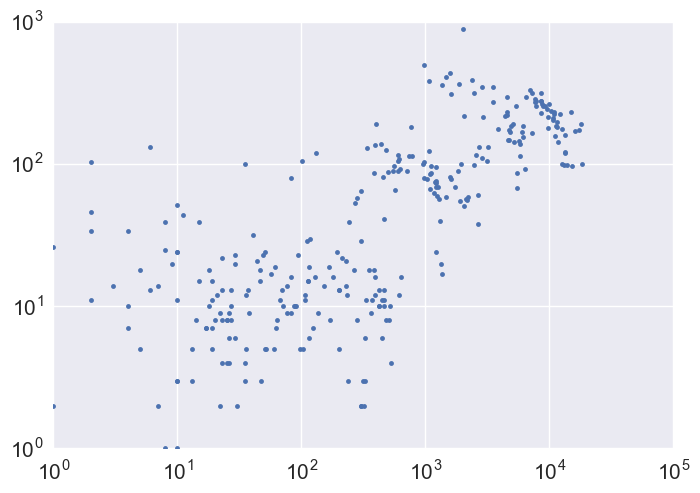

In [958]:
number_using_fam = pd_joined['val_den'].values

plt.plot(pd_joined['val_num'].values, pd_joined['val_den'].values, '.')
plt.xscale('log')
plt.yscale('log')
#xlabel('number HIV positive using modern family')
#ylabel('testing HIV positive')

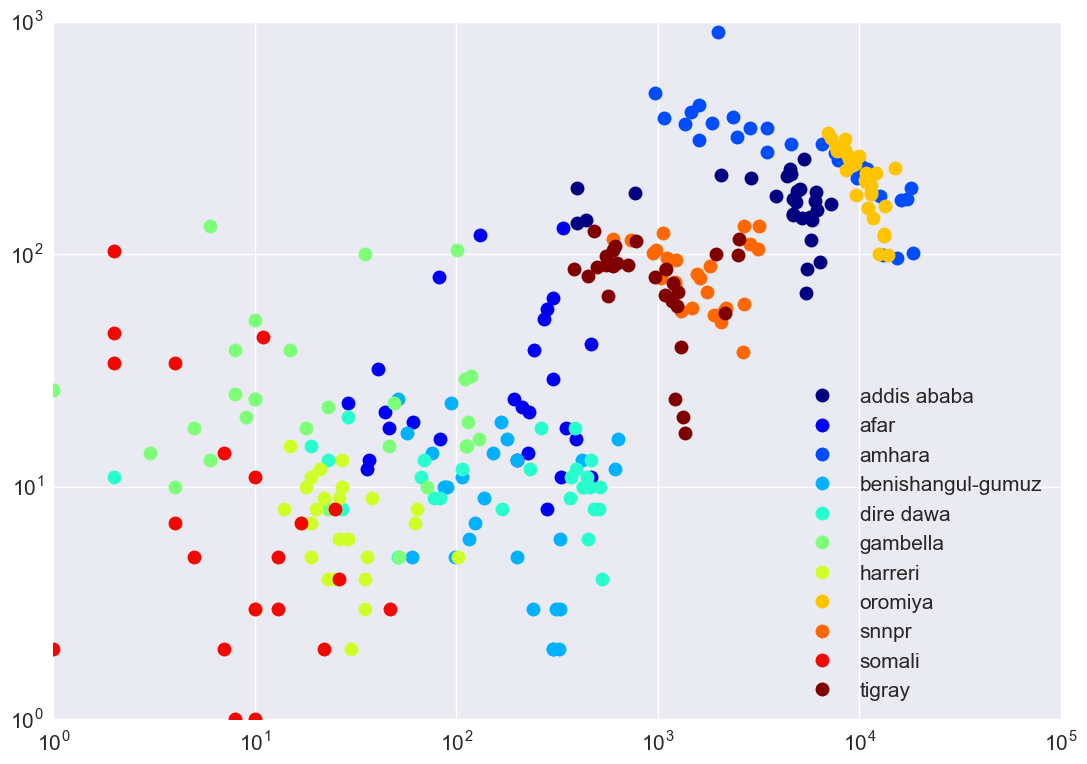

In [997]:
series_num = pd_joined.groupby(['Region_num', 'Real_Date_num']).val_num.sum()
series_den = pd_joined.groupby(['Region_num', 'Real_Date_num']).val_den.sum()

start,stop=0,1
number_of_colors= len(series_num.index.levels[0])
cm_subsection = linspace(start, stop, number_of_colors) 
colors = [ cm.jet(x) for x in cm_subsection ]

fig=figure()
fig.set_size_inches(13, 9)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

for level,color in zip(series_num.index.levels[0],colors):
    plt.plot(series_num[level].values, series_den[level].values, '.', color=color, markersize=20, label=level,)
    #plt.plot(np.logspace(0,3,10), np.logspace(0,3,10), '-k')
ylabel('Number of Women testing positve for HIV')
xlabel('Number of HIV positive woman using a form of mondern family planing')
plt.legend(loc='lower right')
plt.xscale('log')
plt.yscale('log')

<h3> calculate the fraction of HIV positive woman who use modern familiy planning </h3>

<h1> Trends for HIV postivie cases and number HIV tests conducted </h1>

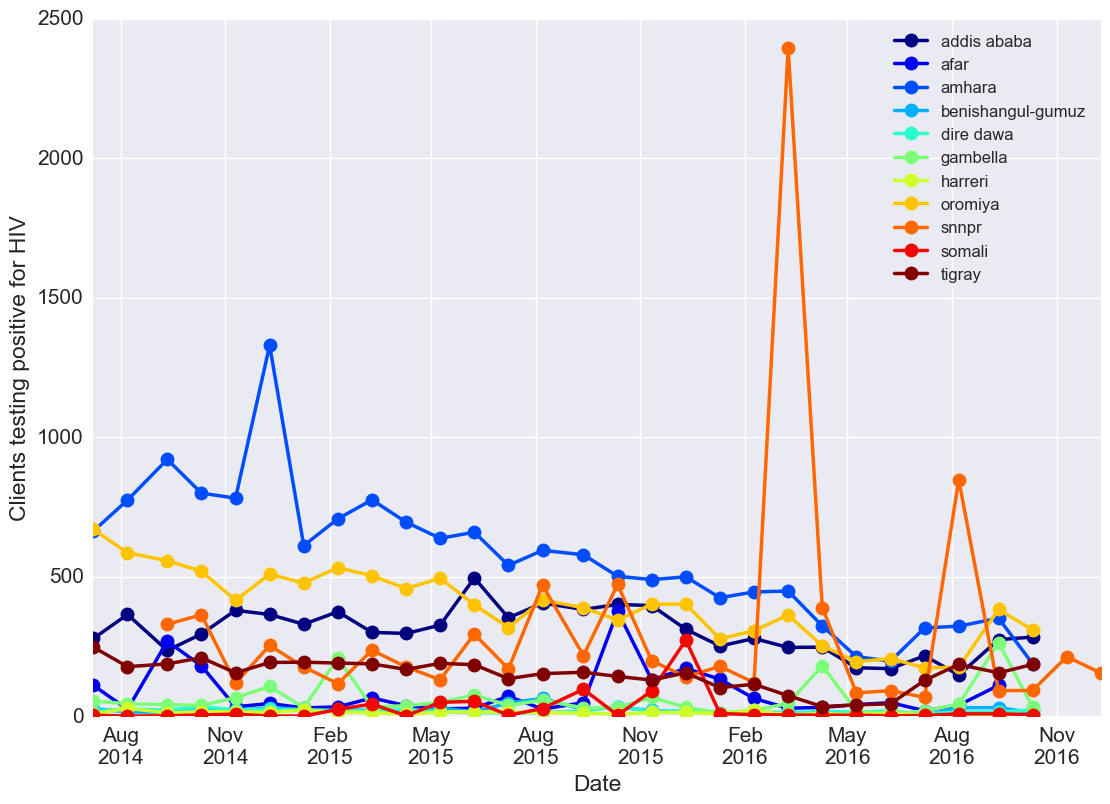

In [876]:
indicator = 'Clients testing positive for HIV'
indicator2 = None
hiv_pos_to_total_tests = plot_date_indicator(DF_ind, indicator, ind2=indicator2)

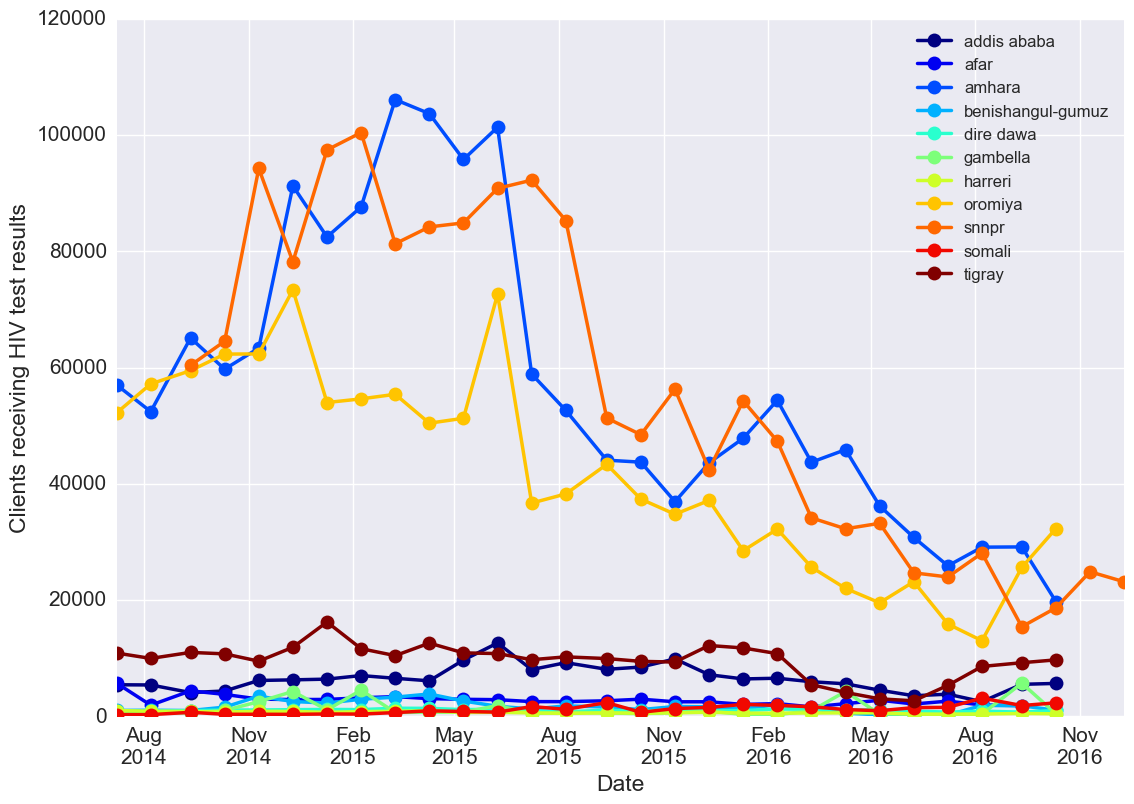

In [877]:
indicator = 'Clients receiving HIV test results'
hiv_pos_to_total_tests = plot_date_indicator(DF_ind, indicator, ind2=None)

<h1> Clients testing positive normalized to clients receiving HIV test result </h1>

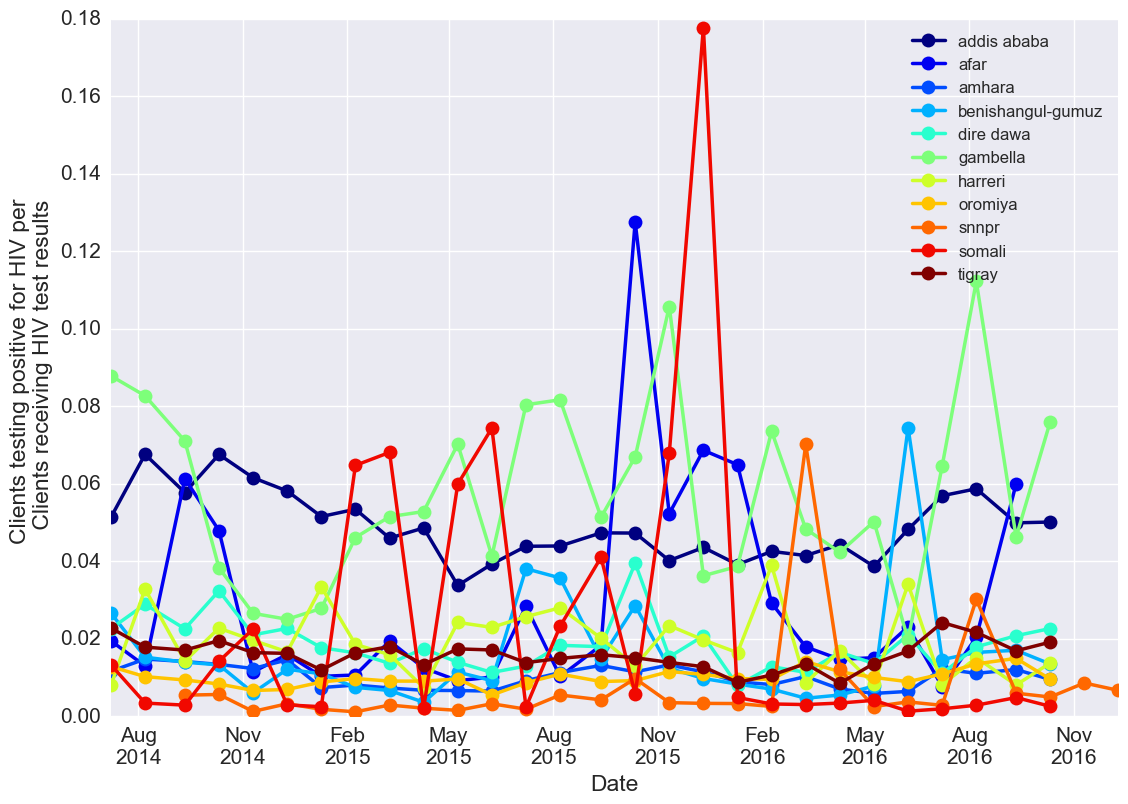

In [878]:
indicator = 'Clients testing positive for HIV'
indicator2 = 'Clients receiving HIV test results'
hiv_pos_to_total_tests = plot_date_indicator(DF_ind, indicator, ind2=indicator2)

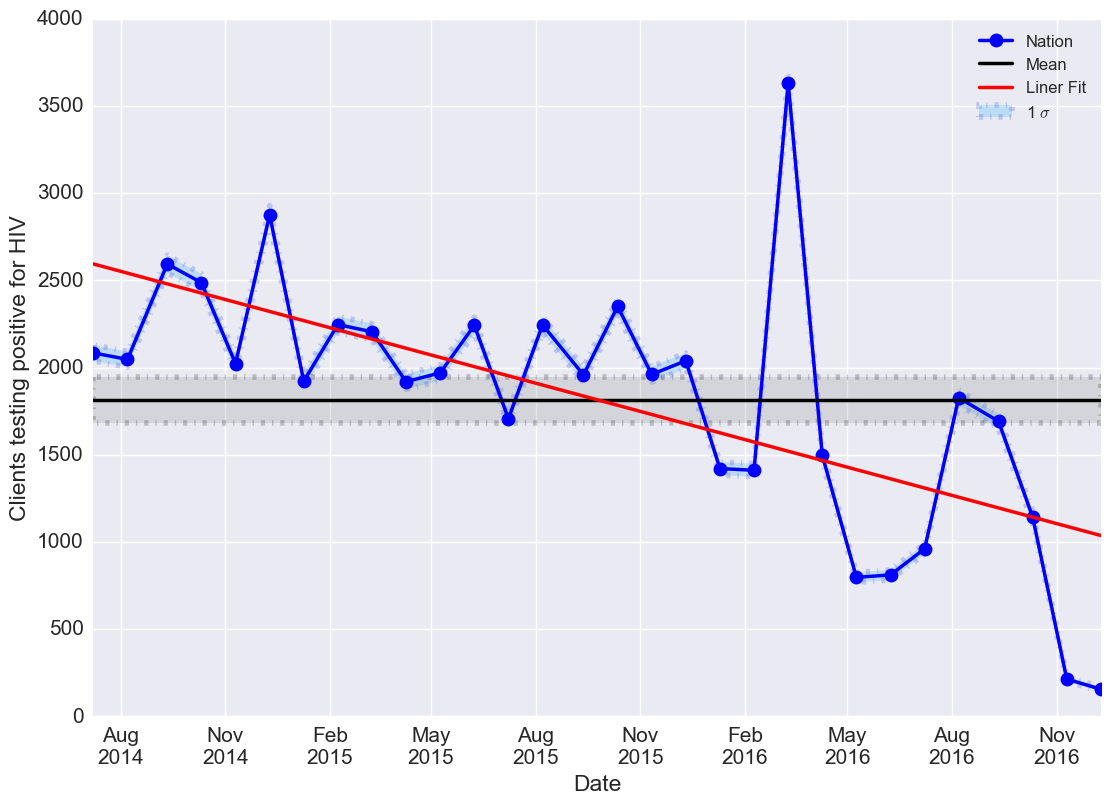

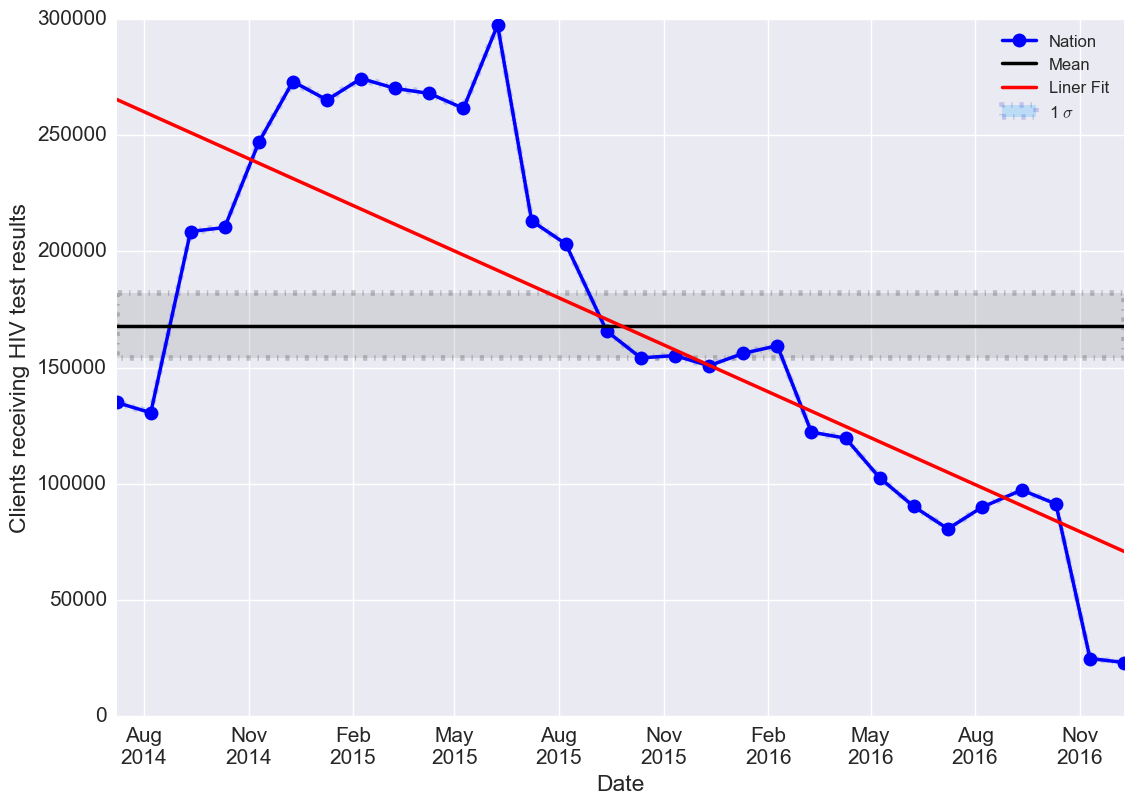

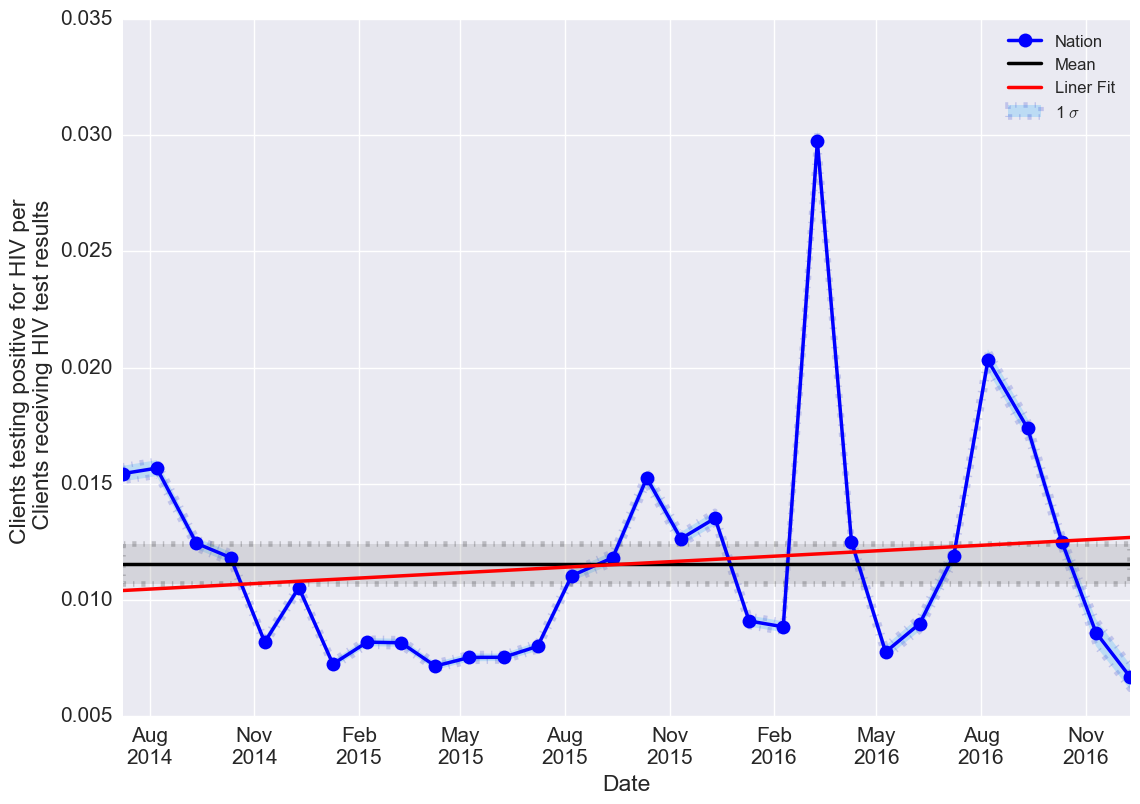

In [879]:
indicator = 'Clients testing positive for HIV'
indicator2 = 'Clients receiving HIV test results'

hiv_pos_to_total_tests = plot_date_indicator_nation(DF_ind, indicator, ind2=None, plt_mean=True, plt_mean_std=True)
hiv_pos_to_total_tests = plot_date_indicator_nation(DF_ind, indicator2, ind2=None, plt_mean=True, plt_mean_std=True)
hiv_pos_to_total_tests = plot_date_indicator_nation(DF_ind, indicator, ind2=indicator2, plt_mean=True, plt_mean_std=True)


In [996]:
hiv_pos_to_total_tests.index

DatetimeIndex(['2014-07-08', '2014-08-07', '2014-09-11', '2014-10-11',
               '2014-11-10', '2014-12-10', '2015-01-09', '2015-02-08',
               '2015-03-10', '2015-04-09', '2015-05-09', '2015-06-08',
               '2015-07-08', '2015-08-07', '2015-09-12', '2015-10-12',
               '2015-11-11', '2015-12-11', '2016-01-10', '2016-02-09',
               '2016-03-10', '2016-04-09', '2016-05-09', '2016-06-08',
               '2016-07-08', '2016-08-07', '2016-09-11', '2016-10-11',
               '2016-11-10', '2016-12-10'],
              dtype='datetime64[ns]', name=u'Real_Date', freq=None)